In [ ]:
from collections import OrderedDict

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
!wget 'https://nlp.stanford.edu/data/glove.6B.zip'

--2024-03-22 21:01:29--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-22 21:01:30--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2024-03-22 21:04:09 (5.18 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
!unzip -o glove.6B.zip glove.6B.100d.txt

Archive:  glove.6B.zip
  inflating: glove.6B.100d.txt       


In [ ]:
from gensim.models import keyedvectors

glove = keyedvectors.load_word2vec_format("glove.6B.100d.txt", binary=False, no_header=True)

# (1) Show word embeddings for the following tokens, in both Word2Vec and GloVe

## Word2Vec

In [ ]:
tokens = "king, queen, man, woman, boy, girl, uncle, aunt, niece, nephew, cousin, grandfather, grandmother, male, female, sister, brother, apple, orange, banana, apricot, pear, kiwi, grape, blueberry, cherries, avocado, melon, cantaloupe, automobile, ambulance, armored car, aircraft, airplane, bicycle, battleship, air ballon, bullet trained, bike, cargo ship, cruise ship, container ship, ferry, gondola, truck, train, device, computer, laptop, desktop, notebook, server, cluster, supercomputer, Turing, machine, automata, pushdown automaton, New York, London, Paris, Rome, Ottawa, Mexico City, Berlin, Tokyo, Beijing, New Delhi, Dhaka, Canberra, Brasilia, USA, England, France, Italy, Canada, Mexico, Germany, Japan, China, India, Bangladesh, Australia, Brazil, January, February, March, April, May, June, July August, September, October, November, December, England, France, Germany, Italy, Spain, Portugal, Poland, English, French, German, Italian, Spanish, Portuguese, Polish"
tokens = tokens.split(", ")

for token in tokens:
  words = token.split(" ")
  embeddings = sum(wv[word] for word in words)
  print(f"{token}: {embeddings}")

Streaming output truncated to the last 5000 lines.
  9.86328125e-02 -1.67968750e-01 -2.83203125e-01 -2.05078125e-02
 -5.76171875e-02 -4.76074219e-02  7.03125000e-02  9.37500000e-02
 -2.74658203e-02 -3.93066406e-02 -4.57031250e-01  1.67968750e-01
 -3.10546875e-01  1.41601562e-01 -1.60156250e-01  2.03857422e-02
 -2.71484375e-01 -1.89453125e-01  1.78710938e-01  2.48046875e-01
  4.76074219e-02  2.99072266e-02 -4.83398438e-02  2.95410156e-02
  1.36718750e-01 -1.06201172e-02  1.31835938e-01  2.24609375e-01
  5.10253906e-02  5.68847656e-02 -8.66699219e-03 -2.49023438e-01
 -9.52148438e-02  5.54199219e-02 -1.40625000e-01 -2.16796875e-01
 -1.66015625e-01 -2.10937500e-01  1.23046875e-01  4.54101562e-02
  2.47802734e-02  7.08007812e-02 -6.68945312e-02 -1.05590820e-02
  1.12304688e-02 -1.28906250e-01 -4.90722656e-02  3.05175781e-02
  1.29882812e-01  1.94335938e-01 -7.81250000e-02 -3.18359375e-01
  2.63671875e-01 -1.20239258e-02  2.29492188e-01 -3.04687500e-01
 -6.98242188e-02 -8.49609375e-02 -3.247

## GloVe

In [ ]:
tokens = [token.lower() for token in tokens]

for token in tokens:
  words = token.split(" ")
  embeddings = sum(glove[word] for word in words)
  print(f"{token}: {embeddings}")

king: [-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.70487   0.056939
 -0.7132    0.089623  0.41394  -1.3363   -0.61915  -0.33089  -0.52881
  0.16483  -0

# (2) Analyzing Vector Space and Find Analogies, in both Word2Vec and GloVe

## Word2Vec

In [ ]:
result = wv.most_similar(positive=["Woman", "King"], negative=["Man"], topn=1)
print(f"King - Man + Woman = {result}")

result = wv.most_similar(positive=["Woman", "Uncle"], negative=["Man"], topn=1)
print(f"Uncle - Man + Woman = {result}")

result = wv.most_similar(positive=["Female", "Boy"], negative=["Male"], topn=1)
print(f"Boy - Male + Female = {result}")

result = wv.most_similar(positive=["Sister", "Man"], negative=["Woman"], topn=1)
print(f"Man - Woman + Sister = {result}")

result = wv.most_similar(positive=["Rome", "France"], negative=["Paris"], topn=1)
print(f"France - Paris + Rome = {result}")

result = wv.most_similar(positive=["Brasilia", "Canada"], negative=["Ottawa"], topn=1)
print(f"Canada - Ottawa + Brasilia = {result}")

result = wv.most_similar(positive=["Canberra", "India"], negative=["NewDelhi"], topn=1)
print(f"India - NewDelhi + Canberra = {result}")

result = wv.most_similar(positive=["June", "December"], negative=["November"], topn=1)
print(f"December - November + June = {result}")

result = wv.most_similar(positive=["October", "August"], negative=["February"], topn=1)
print(f"August - February + October = {result}")

result = wv.most_similar(positive=["English", "France"], negative=["french"], topn=1)
print(f"France - french + English = {result}")

King - Man + Woman = [('Queen', 0.4929387867450714)]
Uncle - Man + Woman = [('Grandpa', 0.5774666666984558)]
Boy - Male + Female = [('Girl', 0.620254397392273)]
Man - Woman + Sister = [('Brother', 0.5358436107635498)]
France - Paris + Rome = [('Italy', 0.714356005191803)]
Canada - Ottawa + Brasilia = [('Brazil', 0.6786075234413147)]
India - NewDelhi + Canberra = [('Australia', 0.6694232225418091)]
December - November + June = [('March', 0.875510036945343)]
August - February + October = [('September', 0.9344380497932434)]
France - french + English = [('Funeral_Home_Oakmont', 0.468493789434433)]


## GloVe

In [ ]:
result = glove.most_similar(positive=["woman", "king"], negative=["man"], topn=1)
print(f"king - man + woman = {result}")

result = glove.most_similar(positive=["woman", "uncle"], negative=["man"], topn=1)
print(f"uncle - man + woman = {result}")

result = glove.most_similar(positive=["female", "boy"], negative=["male"], topn=1)
print(f"boy - male + female = {result}")

result = glove.most_similar(positive=["sister", "man"], negative=["woman"], topn=1)
print(f"man - woman + sister = {result}")

result = glove.most_similar(positive=["rome", "france"], negative=["paris"], topn=1)
print(f"france - paris + rome = {result}")

result = glove.most_similar(positive=["brasilia", "canada"], negative=["ottawa"], topn=1)
print(f"canada - ottawa + brasilia = {result}")

result = glove.most_similar(positive=["canberra", "india"], negative=["delhi"], topn=1)
print(f"india - delhi + canberra = {result}")

result = glove.most_similar(positive=["june", "december"], negative=["november"], topn=1)
print(f"december - november + june = {result}")

result = glove.most_similar(positive=["october", "august"], negative=["february"], topn=1)
print(f"august - february + october = {result}")

result = glove.most_similar(positive=["english", "france"], negative=["french"], topn=1)
print(f"france - french + english = {result}")

king - man + woman = [('queen', 0.7698540687561035)]
uncle - man + woman = [('aunt', 0.8368030190467834)]
boy - male + female = [('girl', 0.894848644733429)]
man - woman + sister = [('brother', 0.8288711905479431)]
france - paris + rome = [('italy', 0.8295994400978088)]
canada - ottawa + brasilia = [('brazil', 0.6611303687095642)]
india - delhi + canberra = [('australia', 0.820895254611969)]
december - november + june = [('july', 0.9814669489860535)]
august - february + october = [('september', 0.9824297428131104)]
france - french + english = [('england', 0.7678162455558777)]


# (3) Similar words to another word, i.e., "very close" in the vector space., in both Word2Vec and GloVe

## Word2Vec

In [ ]:
tokens = "automobile, ship, bike, man, woman, girl, boy, England, France, India, Poland, February, September, December, Paris, London, New Delhi"
tokens = tokens.split(", ")

similar_dict = OrderedDict((token, wv.most_similar(positive=token.split(), topn=5)) for token in tokens)

for token, similar_words in similar_dict.items():
  print(f'5 most similar words to "{token}": {similar_words}')

5 most similar words to "automobile": [('auto', 0.7856054306030273), ('automobiles', 0.7282323837280273), ('automotive', 0.7002270817756653), ('Automobile', 0.6435841917991638), ('tycoon_Edsel_Ford', 0.6199944615364075)]
5 most similar words to "ship": [('ships', 0.8311324715614319), ('vessel', 0.7519895434379578), ('cargo_ship', 0.7459229230880737), ('warship', 0.692990779876709), ('freighter', 0.6829469203948975)]
5 most similar words to "bike": [('bicycle', 0.8521308898925781), ('bikes', 0.8127913475036621), ('mountain_bike', 0.7518467307090759), ('scooter', 0.749575674533844), ('motorcycle', 0.7016158699989319)]
5 most similar words to "man": [('woman', 0.7664012908935547), ('boy', 0.6824871301651001), ('teenager', 0.6586930155754089), ('teenage_girl', 0.6147903203964233), ('girl', 0.5921714305877686)]
5 most similar words to "woman": [('man', 0.7664012908935547), ('girl', 0.7494640946388245), ('teenage_girl', 0.7336829304695129), ('teenager', 0.6317085027694702), ('lady', 0.628878

In [ ]:
for token, similar_words in similar_dict.items():
  word, f = similar_words[0]
  print(f'"{token}" is similar to "{word}": {f}')

"automobile" is similar to "auto": 0.7856054306030273
"ship" is similar to "ships": 0.8311324715614319
"bike" is similar to "bicycle": 0.8521308898925781
"man" is similar to "woman": 0.7664012908935547
"woman" is similar to "man": 0.7664012908935547
"girl" is similar to "boy": 0.8543271422386169
"boy" is similar to "girl": 0.8543272018432617
"England" is similar to "stock_symbol_BNK": 0.7334468364715576
"France" is similar to "French": 0.7000749707221985
"India" is similar to "Indias": 0.7384199500083923
"Poland" is similar to "Hungary": 0.7353939414024353
"February" is similar to "January": 0.9675939083099365
"September" is similar to "October": 0.9544944167137146
"December" is similar to "January": 0.9408605694770813
"Paris" is similar to "Parisian": 0.6789354681968689
"London" is similar to "EURASIAN_NATURAL_RESOURCES_CORP.": 0.6739697456359863
"New Delhi" is similar to "Delhi_Jan.##_ANI": 0.652279257774353


## GloVe

In [ ]:
tokens = [token.lower() for token in tokens]

similar_dict = OrderedDict((token, glove.most_similar(positive=token.split(), topn=5)) for token in tokens)

for token, similar_words in similar_dict.items():
  print(f'5 most similar words to "{token}": {similar_words}')

5 most similar words to "automobile": [('auto', 0.8646974563598633), ('motor', 0.7931246757507324), ('automotive', 0.7538098692893982), ('automobiles', 0.7045329213142395), ('car', 0.6831942796707153)]
5 most similar words to "ship": [('vessel', 0.922712504863739), ('ships', 0.8912948369979858), ('boat', 0.8258435726165771), ('cargo', 0.7835855484008789), ('boats', 0.7709022164344788)]
5 most similar words to "bike": [('bicycle', 0.8968486189842224), ('bikes', 0.7955657243728638), ('ride', 0.7795307636260986), ('rides', 0.7361687421798706), ('riding', 0.7286652326583862)]
5 most similar words to "man": [('woman', 0.8323495388031006), ('boy', 0.7914870977401733), ('one', 0.7788748741149902), ('person', 0.7526816725730896), ('another', 0.7522234916687012)]
5 most similar words to "woman": [('girl', 0.8472671508789062), ('man', 0.832349419593811), ('mother', 0.827568769454956), ('boy', 0.7720510363578796), ('she', 0.7632068395614624)]
5 most similar words to "girl": [('boy', 0.91757297515

In [ ]:
for token, similar_words in similar_dict.items():
  word, f = similar_words[0]
  print(f'"{token}" is similar to "{word}": {f}')

"automobile" is similar to "auto": 0.8646974563598633
"ship" is similar to "vessel": 0.922712504863739
"bike" is similar to "bicycle": 0.8968486189842224
"man" is similar to "woman": 0.8323495388031006
"woman" is similar to "girl": 0.8472671508789062
"girl" is similar to "boy": 0.9175729751586914
"boy" is similar to "girl": 0.9175730347633362
"england" is similar to "scotland": 0.8307284116744995
"france" is similar to "belgium": 0.8076421618461609
"india" is similar to "pakistan": 0.8370323777198792
"poland" is similar to "hungary": 0.7997257709503174
"february" is similar to "october": 0.9948496222496033
"september" is similar to "october": 0.9920579195022583
"december" is similar to "october": 0.9921633005142212
"paris" is similar to "prohertrib": 0.7994136214256287
"london" is similar to "sydney": 0.7536095380783081
"new delhi" is similar to "india": 0.7475586533546448


# (4.a) Plot the first hundred (100) words from the vocabulary (both Word2Vec & GloVe)

In [ ]:
import numpy as np
import pylab


def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P


def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P


def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y


def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = pca(X, initial_dims).real
    (n, d) = X.shape
    max_iter = 1000
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution
    return Y

## Word2Vec

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 100...
Mean value of sigma: 0.775568
Iteration 10: error is 16.932166
Iteration 20: error is 15.947191
Iteration 30: error is 17.658484
Iteration 40: error is 19.782282
Iteration 50: error is 20.651380
Iteration 60: error is 18.332207
Iteration 70: error is 19.510077
Iteration 80: error is 19.980606
Iteration 90: error is 19.341702
Iteration 100: error is 16.145970
Iteration 110: error is 2.615161
Iteration 120: error is 2.156588
Iteration 130: error is 1.836586
Iteration 140: error is 1.627309
Iteration 150: error is 1.484450
Iteration 160: error is 1.352972
Iteration 170: error is 1.261211
Iteration 180: error is 1.190142
Iteration 190: error is 1.136814
Iteration 200: error is 1.092607
Iteration 210: error is 1.142447
Iteration 220: error is 1.097708
Iteration 230: error is 1.068001
Iteration 240: error is 1.038284
Iteration 250: error is 1.014930
Iteration 260: error is 1.004146
It

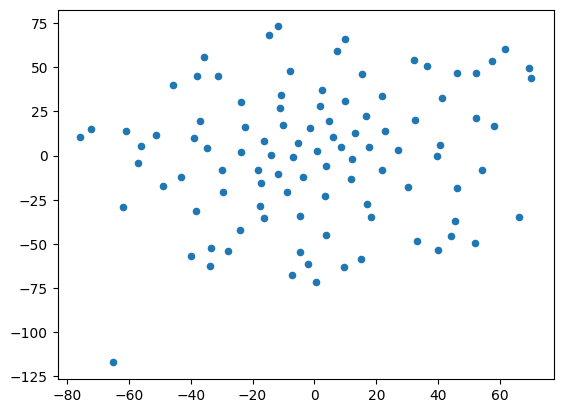

In [ ]:
# first_100_words = wv.index_to_key[:100]
X = np.stack([wv[i] for i in range(100)], dtype=np.float32, axis=0)
labels = wv.index_to_key[:100]
Y = tsne(X, 2, 100, 20.0)
pylab.scatter(Y[:, 0], Y[:, 1], 20)
pylab.show()

## GloVe

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 100...
Mean value of sigma: 1.690855
Iteration 10: error is 14.287026
Iteration 20: error is 14.183445
Iteration 30: error is 14.509045
Iteration 40: error is 14.889025
Iteration 50: error is 13.752154
Iteration 60: error is 14.545910
Iteration 70: error is 14.409294
Iteration 80: error is 14.724935
Iteration 90: error is 13.941237
Iteration 100: error is 14.168180
Iteration 110: error is 2.106064
Iteration 120: error is 1.832921
Iteration 130: error is 1.651308
Iteration 140: error is 1.499797
Iteration 150: error is 1.377561
Iteration 160: error is 1.269605
Iteration 170: error is 1.189804
Iteration 180: error is 1.123573
Iteration 190: error is 1.063249
Iteration 200: error is 1.019524
Iteration 210: error is 0.986195
Iteration 220: error is 0.948400
Iteration 230: error is 0.918191
Iteration 240: error is 0.911182
Iteration 250: error is 0.893336
Iteration 260: error is 0.871020
It

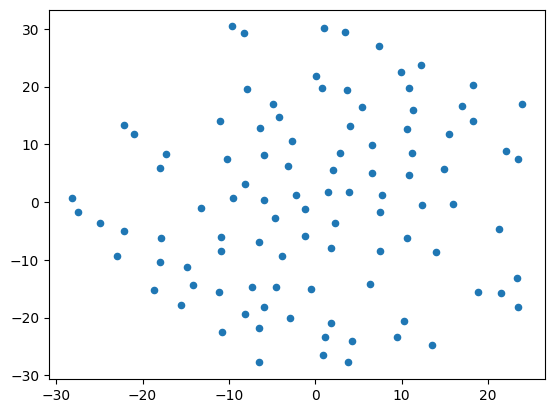

In [ ]:
# first_100_words = glove.index_to_key[:100]
X = np.stack([glove[i] for i in range(100)], dtype=np.float32, axis=0)
labels = glove.index_to_key[:100]
Y = tsne(X, 2, 100, 20.0)
pylab.scatter(Y[:, 0], Y[:, 1], 20)
pylab.show()

# (4.b) Based on the first 100 words, perform clustering analysis by applying both K-Means and Gaussian Mixture Model (each one separate0. Do these results 'resemble' the visualizations from T-SNE's outputs? (both Word2Vec & GloVe)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

## Word2Vec

### K-Means

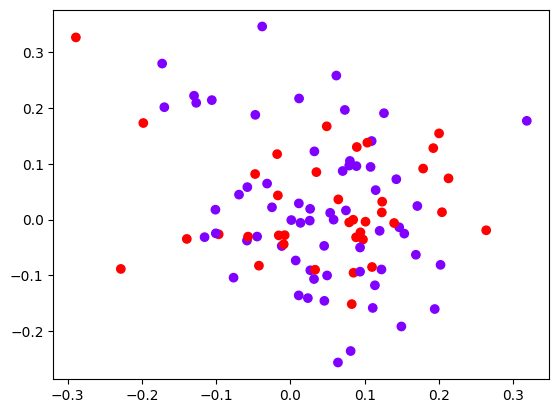

In [ ]:
# word2vec  k-means based on first 100 words
X_1 = np.stack([wv[i] for i in range(100)], dtype=np.float32, axis=0)
data = X_1
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_1)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.show()

### Gaussian Mixture Model

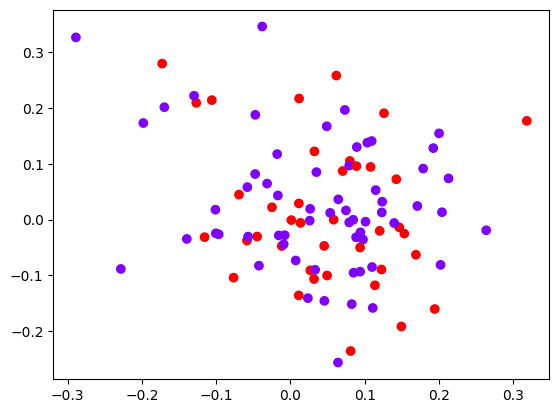

In [ ]:
#gaussian mixture model on word2vec
gmm = GaussianMixture(n_components=2).fit(X_1)
labels= gmm.predict(X_1)
plt.scatter(data[:, 0], data[:, 1], c=labels,cmap='rainbow')
plt.show()

## GloVe

### K-Means

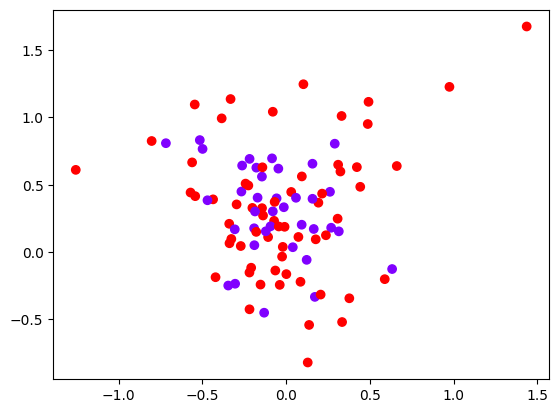

In [ ]:
# glove  k-means clustering based on first 100 words
X_2 = np.stack([glove[i] for i in range(100)], dtype=np.float32, axis=0)
data = X_2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.show()

### Gaussian Mixture Model

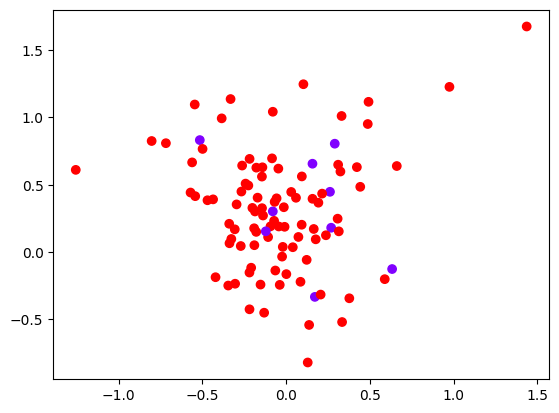

In [ ]:
#gaussian mixture model on word2vec
gmm = GaussianMixture(n_components=2).fit(X_2)
labels= gmm.predict(X_2)
plt.scatter(data[:, 0], data[:, 1], c=labels,cmap='rainbow')
plt.show()

# (4.c) Plot the last hundred (100) words from the vocabulary (both Word2Vec & GloVe)

## Word2Vec

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 100...
Mean value of sigma: 0.321269
Iteration 10: error is 20.102815
Iteration 20: error is 22.427664
Iteration 30: error is 21.538167
Iteration 40: error is 24.901276
Iteration 50: error is 27.121048
Iteration 60: error is 27.991733
Iteration 70: error is 27.710106
Iteration 80: error is 27.630629
Iteration 90: error is 27.867144
Iteration 100: error is 26.626546
Iteration 110: error is 3.468859
Iteration 120: error is 2.252863
Iteration 130: error is 1.792567
Iteration 140: error is 1.665185
Iteration 150: error is 1.570449
Iteration 160: error is 1.492141
Iteration 170: error is 1.408474
Iteration 180: error is 1.402961
Iteration 190: error is 1.346217
Iteration 200: error is 1.315036
Iteration 210: error is 1.297307
Iteration 220: error is 1.273989
Iteration 230: error is 1.248053
Iteration 240: error is 1.236228
Iteration 250: error is 1.230819
Iteration 260: error is 1.226727
It

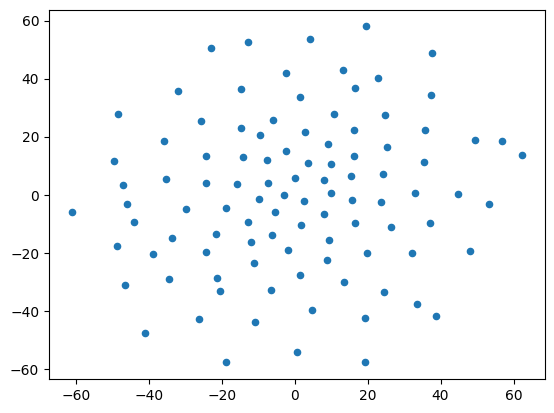

In [ ]:
# first_100_words = wv.index_to_key[:100]
X = np.stack([wv[i] for i in range(len(wv) - 100, len(wv))], dtype=np.float32, axis=0)
labels = wv.index_to_key[:100]
Y = tsne(X, 2, 100, 20.0)
pylab.scatter(Y[:, 0], Y[:, 1], 20)
pylab.show()

## GloVe

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 100...
Mean value of sigma: 0.859526
Iteration 10: error is 15.781246
Iteration 20: error is 16.501507
Iteration 30: error is 17.940346
Iteration 40: error is 16.182638
Iteration 50: error is 16.187745
Iteration 60: error is 17.509848
Iteration 70: error is 18.339679
Iteration 80: error is 17.460195
Iteration 90: error is 17.096835
Iteration 100: error is 17.267736
Iteration 110: error is 2.391034
Iteration 120: error is 2.051839
Iteration 130: error is 1.886669
Iteration 140: error is 1.752028
Iteration 150: error is 1.519267
Iteration 160: error is 1.393077
Iteration 170: error is 1.343736
Iteration 180: error is 1.275267
Iteration 190: error is 1.217498
Iteration 200: error is 1.190446
Iteration 210: error is 1.161345
Iteration 220: error is 1.132001
Iteration 230: error is 1.107975
Iteration 240: error is 1.089103
Iteration 250: error is 1.069978
Iteration 260: error is 1.052253
It

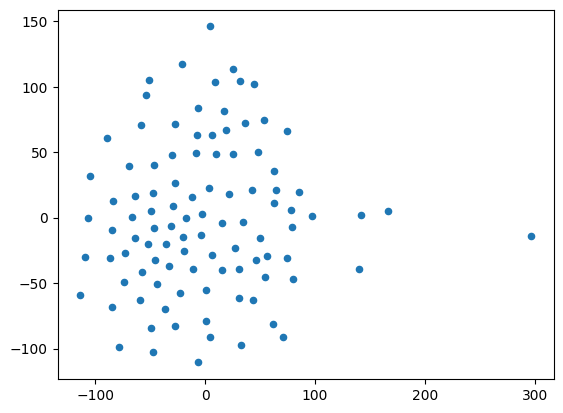

In [ ]:
# first_100_words = glove.index_to_key[:100]
X = np.stack([glove[i] for i in range(len(glove) - 100, len(glove))], dtype=np.float32, axis=0)
labels = glove.index_to_key[:100]
Y = tsne(X, 2, 100, 20.0)
pylab.scatter(Y[:, 0], Y[:, 1], 20)
pylab.show()

# (4.d) Based on the last 100 words, perform clustering analysis by applying both K-Means and Gaussian Mixture Model (each one separate0. Do these results 'resemble' the visualizations from T-SNE's outputs? (both Word2Vec & GloVe)

## Word2Vec

### K-Means

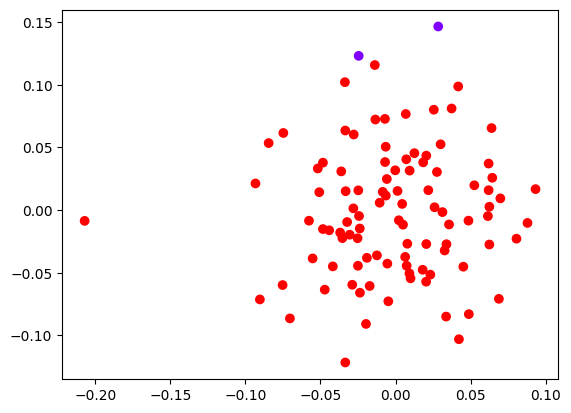

In [ ]:
# word2vec  k-means based on last 100 words
X_1 = np.stack([wv[i] for i in range(len(wv) - 100, len(wv))], dtype=np.float32, axis=0)
data = X_1
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_1)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.show()

### Gaussian Mixture Model

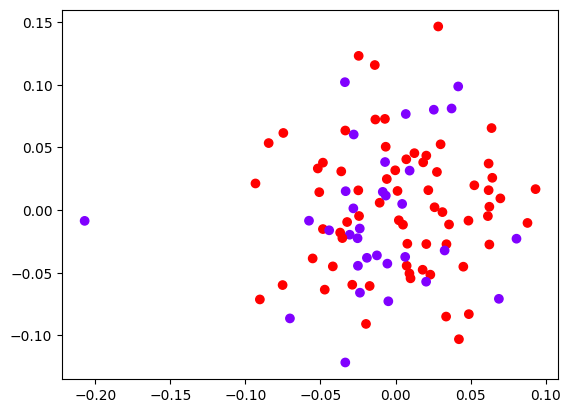

In [ ]:
#gaussian mixture model on word2vec
gmm = GaussianMixture(n_components=2).fit(X_1)
labels= gmm.predict(X_1)
plt.scatter(data[:, 0], data[:, 1], c=labels,cmap='rainbow')
plt.show()

## GloVe

### K-Means

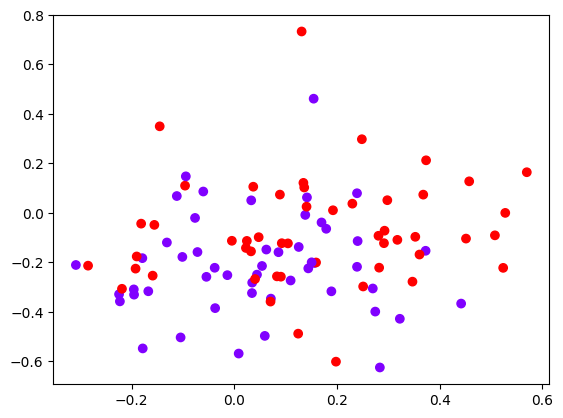

In [ ]:
# glove  k-means clustering based on lasst 100 words
X_2 = np.stack([glove[i] for i in range(len(glove) - 100, len(glove))], dtype=np.float32, axis=0)
data = X_2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_2)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.show()

### Gaussian Mixture Model

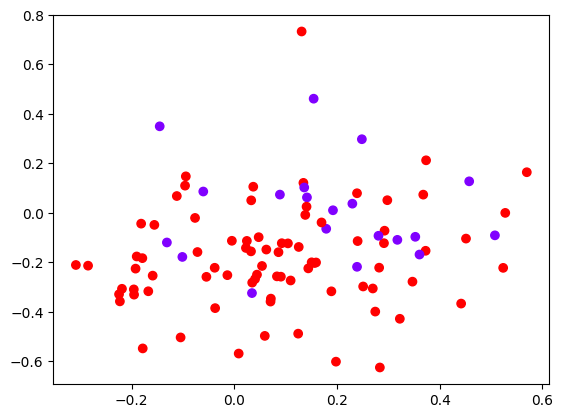

In [ ]:
#gaussian mixture model on word2vec
gmm = GaussianMixture(n_components=2).fit(X_2)
labels= gmm.predict(X_2)
plt.scatter(data[:, 0], data[:, 1], c=labels,cmap='rainbow')
plt.show()

# 4.e Plot the first ten (10) words that are similar to 'man' (both Word2Vec and GloVe)

## Word2Vec

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 8.881681
Iteration 20: error is 11.310702
Iteration 30: error is 10.929479
Iteration 40: error is 9.225995
Iteration 50: error is 8.760888
Iteration 60: error is 9.099224
Iteration 70: error is 10.905267
Iteration 80: error is 10.562844
Iteration 90: error is 9.482787
Iteration 100: error is 10.085605
Iteration 110: error is 1.008653
Iteration 120: error is 0.823007
Iteration 130: error is 0.681807
Iteration 140: error is 0.607383
Iteration 150: error is 0.553846
Iteration 160: error is 0.505260
Iteration 170: error is 0.462395
Iteration 180: error is 0.425202
Iteration 190: error is 0.392230
Iteration 200: error is 0.363166
Iteration 210: error is 0.338322
Iteration 220: error is 0.318156
Iteration 230: error is 0.302923
Iteration 240: error is 0.292336
Iteration 250: error is 0.285392
Iteration 260: error is 0.280850
I

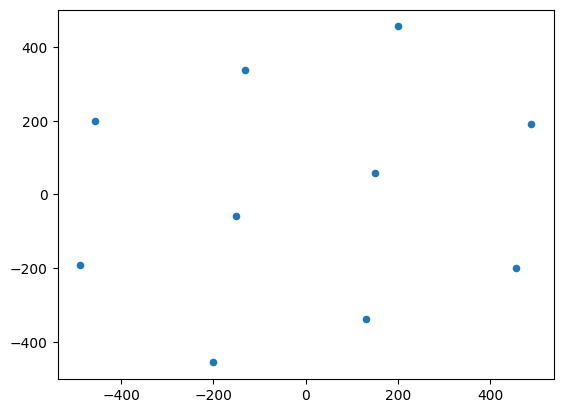

In [ ]:
word = "man"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(wv.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([wv[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

## GloVe

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 7.575620
Iteration 20: error is 7.222896
Iteration 30: error is 7.988150
Iteration 40: error is 7.930465
Iteration 50: error is 7.927639
Iteration 60: error is 7.878458
Iteration 70: error is 7.742218
Iteration 80: error is 7.788924
Iteration 90: error is 14.505748
Iteration 100: error is 7.226928
Iteration 110: error is 0.378466
Iteration 120: error is 0.323638
Iteration 130: error is 0.294435
Iteration 140: error is 0.281783
Iteration 150: error is 0.275268
Iteration 160: error is 0.269374
Iteration 170: error is 0.263536
Iteration 180: error is 0.258437
Iteration 190: error is 0.254901
Iteration 200: error is 0.253010
Iteration 210: error is 0.252182
Iteration 220: error is 0.251811
Iteration 230: error is 0.251608
Iteration 240: error is 0.251470
Iteration 250: error is 0.251357
Iteration 260: error is 0.251255
Itera

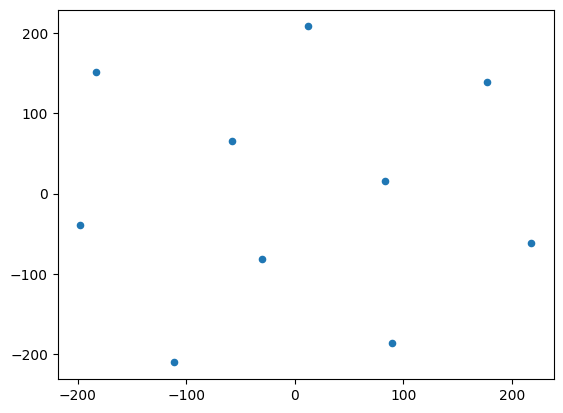

In [ ]:
word = "man"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(glove.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([glove[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

# (4.f) Plot the first ten (10) words that are similar to 'woman' (both Word2Vec & GloVe)

## Word2Vec

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 7.428229
Iteration 20: error is 7.977861
Iteration 30: error is 9.744899
Iteration 40: error is 8.936805
Iteration 50: error is 8.822346
Iteration 60: error is 8.811058
Iteration 70: error is 8.964976
Iteration 80: error is 9.448420
Iteration 90: error is 11.951410
Iteration 100: error is 9.206316
Iteration 110: error is 0.548918
Iteration 120: error is 0.469366
Iteration 130: error is 0.393293
Iteration 140: error is 0.347129
Iteration 150: error is 0.322957
Iteration 160: error is 0.307531
Iteration 170: error is 0.296857
Iteration 180: error is 0.289639
Iteration 190: error is 0.283545
Iteration 200: error is 0.277679
Iteration 210: error is 0.272136
Iteration 220: error is 0.267144
Iteration 230: error is 0.263167
Iteration 240: error is 0.260518
Iteration 250: error is 0.258953
Iteration 260: error is 0.258000
Itera

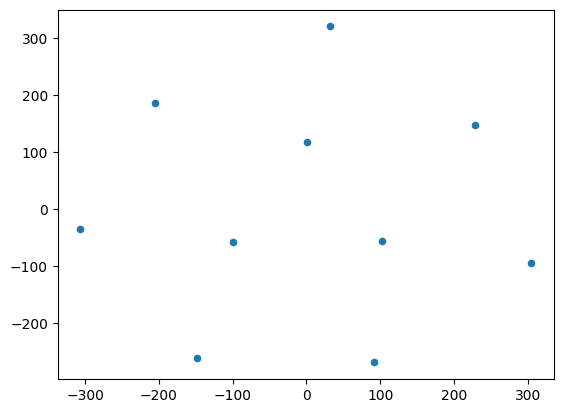

In [ ]:
word = "woman"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(wv.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([wv[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

## GloVe

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 7.344443
Iteration 20: error is 7.494245
Iteration 30: error is 12.149492
Iteration 40: error is 12.186403
Iteration 50: error is 12.138130
Iteration 60: error is 12.534262
Iteration 70: error is 15.069567
Iteration 80: error is 11.487752
Iteration 90: error is 10.102128
Iteration 100: error is 9.884261
Iteration 110: error is 0.983480
Iteration 120: error is 0.900874
Iteration 130: error is 0.844487
Iteration 140: error is 0.801313
Iteration 150: error is 0.762859
Iteration 160: error is 0.728439
Iteration 170: error is 0.699273
Iteration 180: error is 0.675611
Iteration 190: error is 0.655577
Iteration 200: error is 0.637145
Iteration 210: error is 0.619373
Iteration 220: error is 0.601519
Iteration 230: error is 0.583090
Iteration 240: error is 0.563888
Iteration 250: error is 0.543986
Iteration 260: error is 0.523640

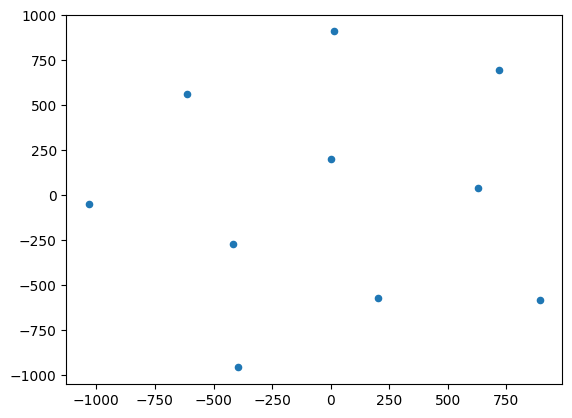

In [ ]:
word = "woman"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(glove.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([glove[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

# (4.g) Plot the first ten (10) words that are similar to 'automobile' (both Word2Vec & GloVe)

## Word2Vec

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 7.222267
Iteration 20: error is 7.241754
Iteration 30: error is 8.579992
Iteration 40: error is 8.560904
Iteration 50: error is 8.509370
Iteration 60: error is 8.523681
Iteration 70: error is 8.523868
Iteration 80: error is 9.148108
Iteration 90: error is 10.129101
Iteration 100: error is 9.544634
Iteration 110: error is 0.966373
Iteration 120: error is 0.902714
Iteration 130: error is 0.825972
Iteration 140: error is 0.747499
Iteration 150: error is 0.684858
Iteration 160: error is 0.637673
Iteration 170: error is 0.598178
Iteration 180: error is 0.562091
Iteration 190: error is 0.528374
Iteration 200: error is 0.496731
Iteration 210: error is 0.467210
Iteration 220: error is 0.440189
Iteration 230: error is 0.416215
Iteration 240: error is 0.395768
Iteration 250: error is 0.378957
Iteration 260: error is 0.365421
Itera

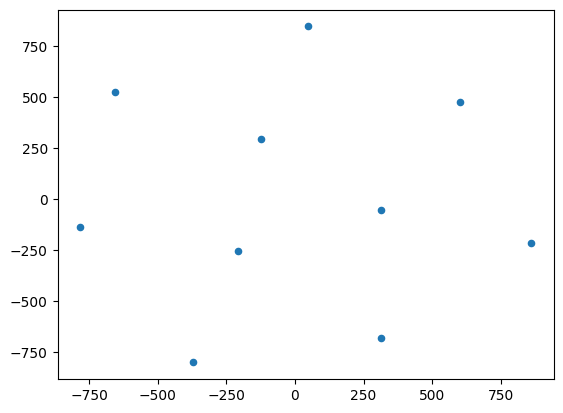

In [ ]:
word = "automobile"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(wv.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([wv[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

## GloVe

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 7.625410
Iteration 20: error is 7.735775
Iteration 30: error is 10.799546
Iteration 40: error is 9.178356
Iteration 50: error is 9.141358
Iteration 60: error is 9.567527
Iteration 70: error is 11.900582
Iteration 80: error is 12.119663
Iteration 90: error is 9.944847
Iteration 100: error is 9.574766
Iteration 110: error is 0.921211
Iteration 120: error is 0.794399
Iteration 130: error is 0.702256
Iteration 140: error is 0.620170
Iteration 150: error is 0.546227
Iteration 160: error is 0.489100
Iteration 170: error is 0.448534
Iteration 180: error is 0.418908
Iteration 190: error is 0.395248
Iteration 200: error is 0.374863
Iteration 210: error is 0.356682
Iteration 220: error is 0.340666
Iteration 230: error is 0.327200
Iteration 240: error is 0.316585
Iteration 250: error is 0.308601
Iteration 260: error is 0.302446
Ite

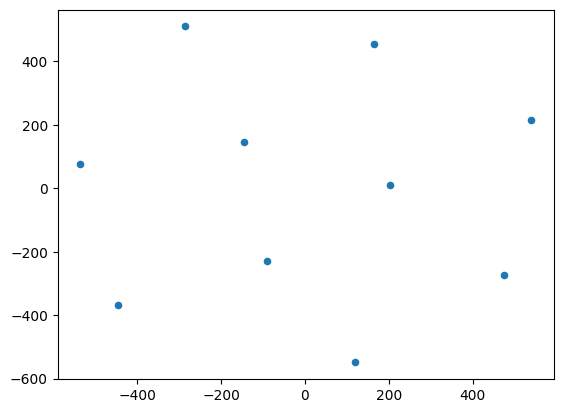

In [ ]:
word = "automobile"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(glove.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([glove[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

# (4.h) Plot the first ten (10) words that are similar to 'computer' (both Word2Vec & GloVe)

## Word2Vec

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 6.930646
Iteration 20: error is 6.890949
Iteration 30: error is 8.827085
Iteration 40: error is 8.723460
Iteration 50: error is 8.671155
Iteration 60: error is 8.572759
Iteration 70: error is 8.509314
Iteration 80: error is 8.696941
Iteration 90: error is 9.834113
Iteration 100: error is 14.794864
Iteration 110: error is 1.272267
Iteration 120: error is 1.063373
Iteration 130: error is 0.923425
Iteration 140: error is 0.821782
Iteration 150: error is 0.751822
Iteration 160: error is 0.699983
Iteration 170: error is 0.656668
Iteration 180: error is 0.616736
Iteration 190: error is 0.578622
Iteration 200: error is 0.542378
Iteration 210: error is 0.508575
Iteration 220: error is 0.477799
Iteration 230: error is 0.450429
Iteration 240: error is 0.426513
Iteration 250: error is 0.405748
Iteration 260: error is 0.387605
Itera

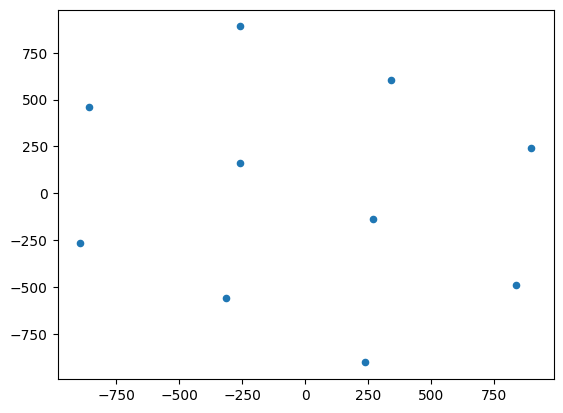

In [ ]:
word = "computer"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(wv.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([wv[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

## GloVe

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 9.268071
Iteration 20: error is 9.842611
Iteration 30: error is 9.171549
Iteration 40: error is 12.286337
Iteration 50: error is 11.236995
Iteration 60: error is 15.069669
Iteration 70: error is 9.370634
Iteration 80: error is 9.071370
Iteration 90: error is 8.915641
Iteration 100: error is 10.835199
Iteration 110: error is 0.875138
Iteration 120: error is 0.701384
Iteration 130: error is 0.587253
Iteration 140: error is 0.480293
Iteration 150: error is 0.379632
Iteration 160: error is 0.300142
Iteration 170: error is 0.268644
Iteration 180: error is 0.258606
Iteration 190: error is 0.255789
Iteration 200: error is 0.254435
Iteration 210: error is 0.253783
Iteration 220: error is 0.253309
Iteration 230: error is 0.252974
Iteration 240: error is 0.252769
Iteration 250: error is 0.252663
Iteration 260: error is 0.252614
It

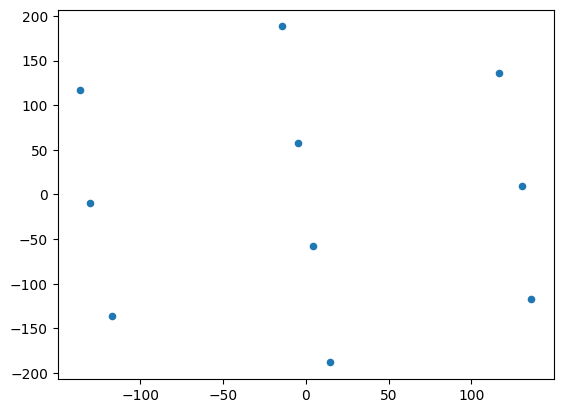

In [ ]:
word = "computer"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(glove.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([glove[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

# (4.i) Plot the first ten (10) words that are similar to 'England' (both Word2Vec & GloVe)

## Word2Vec

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 6.797337
Iteration 20: error is 7.334431
Iteration 30: error is 7.608955
Iteration 40: error is 7.568042
Iteration 50: error is 7.480313
Iteration 60: error is 7.410184
Iteration 70: error is 7.587917
Iteration 80: error is 8.279961
Iteration 90: error is 11.449154
Iteration 100: error is 10.708816
Iteration 110: error is 1.284280
Iteration 120: error is 1.215038
Iteration 130: error is 1.144152
Iteration 140: error is 1.075651
Iteration 150: error is 1.006178
Iteration 160: error is 0.936553
Iteration 170: error is 0.868104
Iteration 180: error is 0.802172
Iteration 190: error is 0.739729
Iteration 200: error is 0.681327
Iteration 210: error is 0.627213
Iteration 220: error is 0.577484
Iteration 230: error is 0.532189
Iteration 240: error is 0.491378
Iteration 250: error is 0.455114
Iteration 260: error is 0.423444
Iter

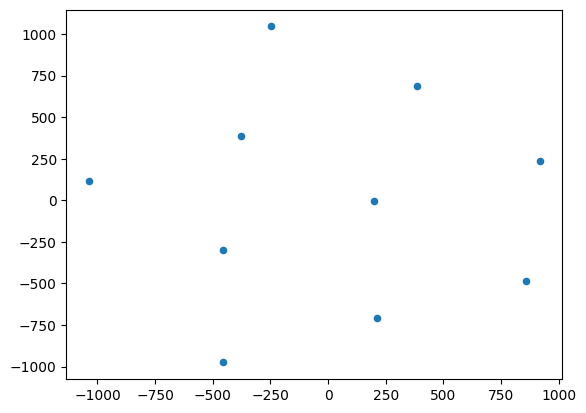

In [ ]:
word = "England"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(wv.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([wv[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

## GloVe

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 7.536789
Iteration 20: error is 7.852811
Iteration 30: error is 8.529583
Iteration 40: error is 8.659877
Iteration 50: error is 9.068598
Iteration 60: error is 11.571998
Iteration 70: error is 11.477762
Iteration 80: error is 9.264736
Iteration 90: error is 12.363122
Iteration 100: error is 9.293607
Iteration 110: error is 0.378144
Iteration 120: error is 0.344688
Iteration 130: error is 0.292711
Iteration 140: error is 0.266950
Iteration 150: error is 0.259165
Iteration 160: error is 0.254175
Iteration 170: error is 0.252428
Iteration 180: error is 0.251762
Iteration 190: error is 0.251460
Iteration 200: error is 0.251295
Iteration 210: error is 0.251168
Iteration 220: error is 0.251057
Iteration 230: error is 0.250962
Iteration 240: error is 0.250891
Iteration 250: error is 0.250845
Iteration 260: error is 0.250820
Ite

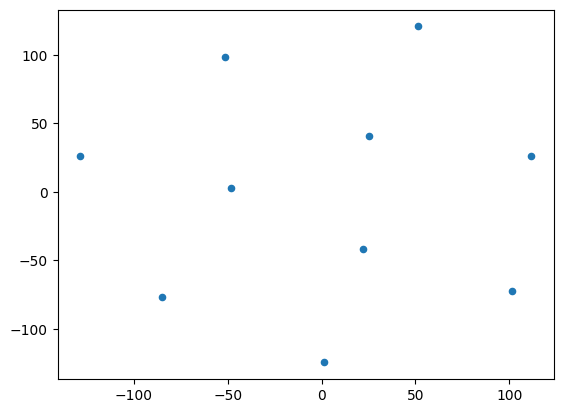

In [ ]:
word = "england"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(glove.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([glove[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

# (4.j) Plot the first ten (10) words that are similar to 'London' (both Word2Vec & GloVe)

## Word2Vec

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 7.352262
Iteration 20: error is 8.063004
Iteration 30: error is 9.239042
Iteration 40: error is 8.020075
Iteration 50: error is 7.791247
Iteration 60: error is 7.609544
Iteration 70: error is 7.830480
Iteration 80: error is 9.242152
Iteration 90: error is 8.594892
Iteration 100: error is 8.587650
Iteration 110: error is 0.729425
Iteration 120: error is 0.549722
Iteration 130: error is 0.431842
Iteration 140: error is 0.388356
Iteration 150: error is 0.354922
Iteration 160: error is 0.328556
Iteration 170: error is 0.312117
Iteration 180: error is 0.294964
Iteration 190: error is 0.280824
Iteration 200: error is 0.272768
Iteration 210: error is 0.268048
Iteration 220: error is 0.263719
Iteration 230: error is 0.259297
Iteration 240: error is 0.255286
Iteration 250: error is 0.252502
Iteration 260: error is 0.251256
Iterat

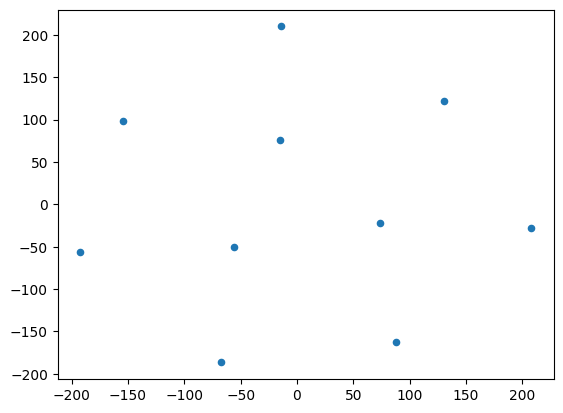

In [ ]:
word = "london"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(wv.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([wv[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

## GloVe

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 7.756543
Iteration 20: error is 15.580697
Iteration 30: error is 12.250595
Iteration 40: error is 14.490619
Iteration 50: error is 14.683270
Iteration 60: error is 18.228882
Iteration 70: error is 19.530143
Iteration 80: error is 8.366076
Iteration 90: error is 8.023372
Iteration 100: error is 7.876933
Iteration 110: error is 0.537109
Iteration 120: error is 0.481852
Iteration 130: error is 0.437983
Iteration 140: error is 0.408767
Iteration 150: error is 0.387616
Iteration 160: error is 0.369761
Iteration 170: error is 0.353208
Iteration 180: error is 0.337499
Iteration 190: error is 0.322950
Iteration 200: error is 0.310376
Iteration 210: error is 0.300608
Iteration 220: error is 0.293876
Iteration 230: error is 0.289491
Iteration 240: error is 0.286465
Iteration 250: error is 0.284127
Iteration 260: error is 0.282112


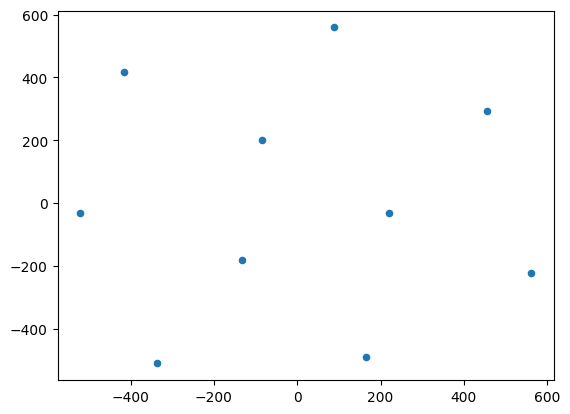

In [ ]:
word = "london"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(glove.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([glove[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimesions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

# (4.k) Plot the first ten (10) words that are similar to 'March' (both Word2Vec & GloVe)

## Word2Vec

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 7.691443
Iteration 20: error is 8.283794
Iteration 30: error is 9.099665
Iteration 40: error is 9.424191
Iteration 50: error is 10.883692
Iteration 60: error is 13.154372
Iteration 70: error is 9.552537
Iteration 80: error is 9.597436
Iteration 90: error is 10.191114
Iteration 100: error is 17.853918
Iteration 110: error is 0.639330
Iteration 120: error is 0.446747
Iteration 130: error is 0.392313
Iteration 140: error is 0.358297
Iteration 150: error is 0.336946
Iteration 160: error is 0.322106
Iteration 170: error is 0.310809
Iteration 180: error is 0.301908
Iteration 190: error is 0.294776
Iteration 200: error is 0.289042
Iteration 210: error is 0.284461
Iteration 220: error is 0.280812
Iteration 230: error is 0.277911
Iteration 240: error is 0.275597
Iteration 250: error is 0.273726
Iteration 260: error is 0.272189
It

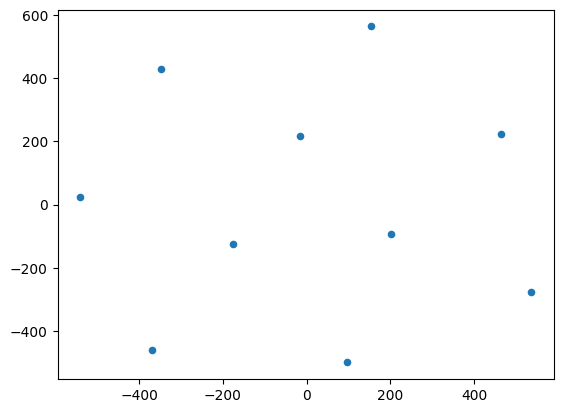

In [ ]:
word = "march"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(wv.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([wv[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimensions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()

## GloVe

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 10...
Mean value of sigma: 33554432.000000
Iteration 10: error is 7.314411
Iteration 20: error is 10.856898
Iteration 30: error is 11.972647
Iteration 40: error is 8.970024
Iteration 50: error is 9.949431
Iteration 60: error is 10.010624
Iteration 70: error is 13.749544
Iteration 80: error is 8.848903
Iteration 90: error is 8.598662
Iteration 100: error is 8.405126
Iteration 110: error is 0.588392
Iteration 120: error is 0.534830
Iteration 130: error is 0.490558
Iteration 140: error is 0.441271
Iteration 150: error is 0.396638
Iteration 160: error is 0.360431
Iteration 170: error is 0.332351
Iteration 180: error is 0.309936
Iteration 190: error is 0.292777
Iteration 200: error is 0.280711
Iteration 210: error is 0.272588
Iteration 220: error is 0.267271
Iteration 230: error is 0.263954
Iteration 240: error is 0.261844
Iteration 250: error is 0.260238
Iteration 260: error is 0.258775
It

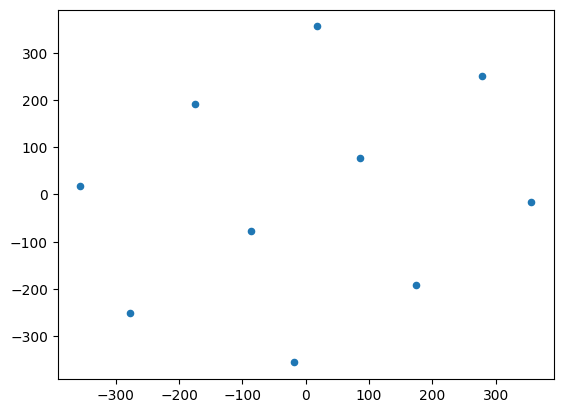

In [ ]:
word = "march"

# Given the word "man" we first find the similar words then extract their embeddings from the models

similar_wrds= np.array(glove.most_similar(positive=word, topn=10))

# Contains the word embeddings of the similar words of man
similar_wrds = np.stack([glove[i] for i in similar_wrds[:,0]], dtype=np.float32, axis=0)

# Dimensions are reduced using TSNE
wrds = tsne(similar_wrds, 2,300, 20.0)
pylab.scatter(wrds[:, 0], wrds[:, 1], 20)
pylab.show()